<a href="https://colab.research.google.com/github/shreyanilbhuyan/project-heart-disease-pred/blob/main/heart_disease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the tools

#regular data nalysis tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to have plots inside the notebook
%matplotlib inline

#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#model eval
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:




df=pd.read_csv("/content/drive/MyDrive/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Visualization

In [4]:
# Let's see the classification of target
df["target"].value_counts()


1    165
0    138
Name: target, dtype: int64

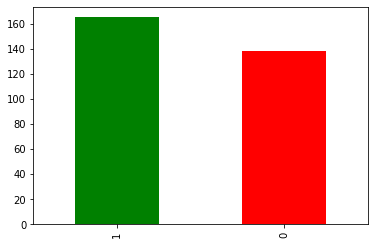

In [5]:
df["target"].value_counts().plot(kind="bar", color=["green","red"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()#returns the no. of NaN if 0 is returned then none of the data is missing

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disese feq acc to sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


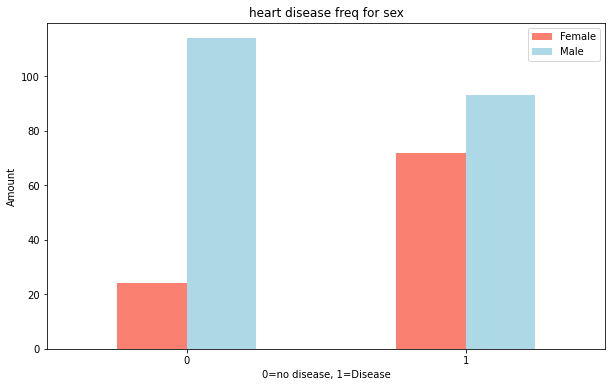

In [11]:





#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);
plt.title("heart disease freq for sex");
plt.xlabel("0=no disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Age vs. max. heart rate for heart disease

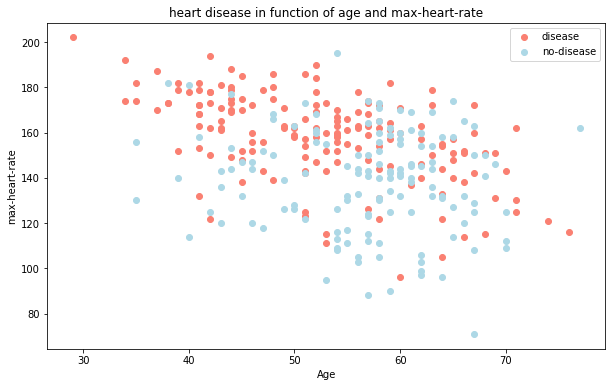

In [12]:
#create another fig
plt.figure(figsize=(10,6))

#scatter with pos exapmples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");
#scatter with neg example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
#add some helpful info
plt.title("heart disease in function of age and max-heart-rate");
plt.xlabel("Age")
plt.ylabel("max-heart-rate")
plt.legend(["disease","no-disease"])
plt.xticks(rotation=0);

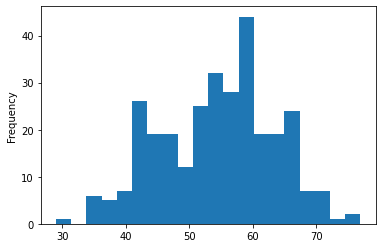

In [13]:
#check the distribution of the age column with a histogram
df.age.plot.hist(bins=20);

## heart disese freq per chest pain type

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


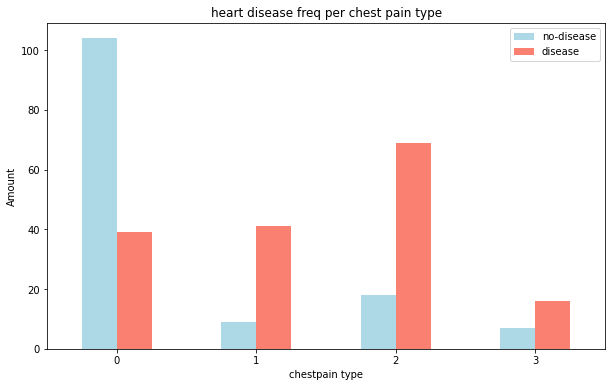

In [15]:
#make the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue","salmon"]);
#add communication
plt.title("heart disease freq per chest pain type");
plt.xlabel("chestpain type")
plt.ylabel("Amount")
plt.legend(["no-disease","disease"])
plt.xticks(rotation=0);

In [16]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

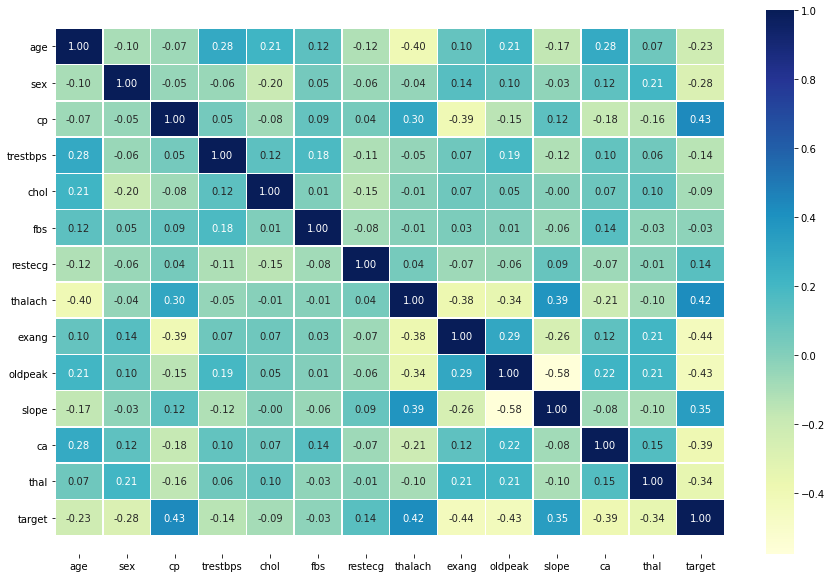

In [17]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)
#higher positive val more corelation

## modelling

In [18]:
x=df.drop("target",axis=1)
y=df["target"]

In [19]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
#split data into train and test ser
np.random.seed(0)

#split into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape

(242, 13)

In [23]:
y_train.shape

(242,)

## We are going to try 2 models: 
 1.logistic regression 

 2.k-nearest neighbours classifier 
 

In [24]:
#putting models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier()}
#creating a model to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given model
    models:dictionary for storing models
    """
    #set random seed
    np.random.seed(42)
    
    #make dictionary to keep model score
    model_scores={}
    
    #Loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        #evaluate and append in model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.639344262295082, 'Logistic Regression': 0.8524590163934426}

## model comparision

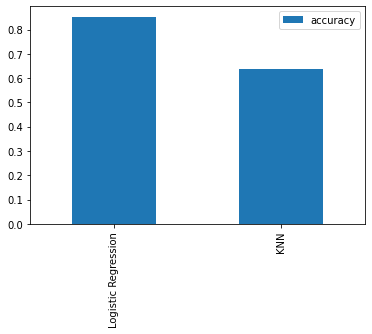

In [26]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

## Hyper parameter tuning

In [27]:
#tuning knn

train_scores = []
test_scores = []

#create a list for different values of n_neighbour(one of the hyper parameter)
neighbors=range(1,21)

#set up knn
knn=KNeighborsClassifier()

#lopp through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)# changing the neighbours
    
    #fit the algorithm
    knn.fit(x_train,y_train)
    
    #update the training score list
    train_scores.append(knn.score(x_train,y_train))
    
    #test score
    test_scores.append(knn.score(x_test,y_test))

In [28]:
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818]

In [29]:
test_scores

[0.5245901639344263,
 0.5901639344262295,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data: 72.13%


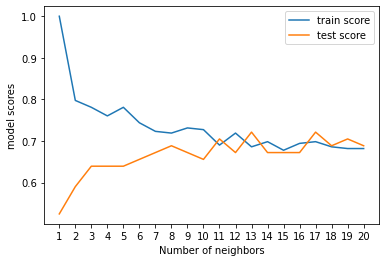

In [30]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("model scores")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:0.2f}%")

## Hyperparameter tuning with randomized CV

In [31]:
#create a hyper parameter grid for logisric regression
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}

In [32]:
#tune logistic egression
np.random.seed(42)

#setup random hyperparameters search formlogistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True
                               )
#Fir random hyperparameter model for logisticregression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [33]:
rs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [34]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

## Hyperparameter tuning using gridsearch cv

In [35]:
#logistic regression
log_reg_grid={"C": np.logspace(-4,4,100),
              "solver":["liblinear"]}

#setting usp grid search hyperparameter
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True
                               )
#Fit random hyperparameter model for logisticregression
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.2...
       6.13590727e+02, 7.39072203e+02, 8.90215085e+02, 1.07226722e+03,
       1.29154967e+03, 1.55567614e+03, 1.87381742e+03, 2.25701972e+03,
       2.71858824e+03, 3.27454916e+03, 3.94420606e+03, 4.75081016e+03,
       5.72236766e+03, 6.89261210e+03, 8.30217568e+03, 1.00000000e+04]),
      

In [36]:
#find the best hyperparameters
gs_log_reg.best_params_

{'C': 0.9111627561154896, 'solver': 'liblinear'}

In [37]:
gs_log_reg.score(x_test,y_test)

0.8524590163934426

##Confusion matrix

In [38]:
#make prediction with tuned model
y_pred = gs_log_reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

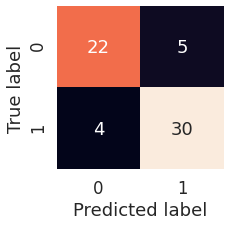

In [40]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_pred)

## calculate eval metrics using cross validation

In [ ]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.9111627561154896, 'solver': 'liblinear'}

In [ ]:
#create a new classifier with best parameters
clf=LogisticRegression(C=0.9111627561154896,solver="liblinear")

In [ ]:
#cross-validation accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")

cv_acc_mean=np.mean(cv_acc)
cv_acc_mean

0.8215300546448088

In [ ]:
#cross-validation precision
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_precision_mean=np.mean(cv_precision)
cv_precision_mean

0.817900063251107

In [ ]:
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall_mean=np.mean(cv_recall)
cv_recall_mean

0.8727272727272727

In [ ]:
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1_mean=np.mean(cv_f1)
cv_f1_mean

0.8431741323998502

In [ ]:
cv_metrics_table=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall" :cv_recall,
                         "F1":cv_f1}
)
cv_metrics_table

,Accuracy,Precision,Recall,F1
0,0.819672,0.789474,0.909091,0.845070
1,0.868852,0.903226,0.848485,0.875000
2,0.852459,0.852941,0.878788,0.865672
3,0.850000,0.833333,0.909091,0.869565
4,0.716667,0.710526,0.818182,0.760563


,Accuracy,Precision,Recall,F1
0,0.82153,0.8179,0.872727,0.843174


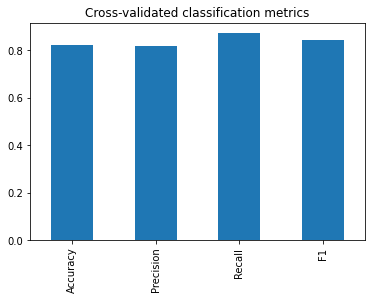

In [ ]:
#visualising cross-validated matrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc_mean,
                         "Precision":cv_precision_mean,
                         "Recall" :cv_recall_mean,
                         "F1":cv_f1_mean},index=[0]
)

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)
cv_metrics

## Feature importance

In [41]:
#fit an instance of logistic regression
clf=LogisticRegression(C=0.9111627561154896,solver="liblinear")
clf.fit(x_train,y_train);

In [42]:
clf.coef_

array([[ 0.00684448, -1.48209913,  0.73796273, -0.00843321, -0.00372608,
        -0.31259963,  0.2222026 ,  0.02914845, -0.81750585, -0.53343343,
         0.20375354, -0.84846854, -0.67152565]])

In [43]:
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.006844477820084294,
 'ca': -0.8484685366945726,
 'chol': -0.0037260752201639436,
 'cp': 0.7379627268933788,
 'exang': -0.8175058526644419,
 'fbs': -0.31259963462447055,
 'oldpeak': -0.5334334258378485,
 'restecg': 0.22220260219248972,
 'sex': -1.4820991341488787,
 'slope': 0.20375354159692213,
 'thal': -0.6715256483419374,
 'thalach': 0.029148452316815184,
 'trestbps': -0.008433214660727394}

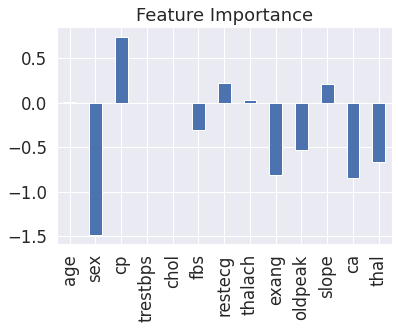

In [44]:
cv_metrics=pd.DataFrame(feature_dict,index=[0])
cv_metrics.T.plot.bar(title="Feature Importance",legend=False)